<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/ML_Cluster_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [ ]:
df = pd.read_csv(url)


In [ ]:
df.rename(columns={'Channel':'canal', 'Region':'regiao', 
                   'Fresh':'alimentos_frescos', 
                   'Milk':'laticinios', 
                   'Grocery':'mercado', 
                   'Frozen':'congelados', 
                   'Detergents_Paper':'limpeza_papel', 
                   'Delicassen':'frios'}, inplace=True)

In [ ]:
df.head()

,canal,regiao,alimentos_frescos,laticinios,mercado,congelados,limpeza_papel,frios
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df['regiao'].value_counts()

3    316
1     77
2     47
Name: regiao, dtype: int64

In [ ]:
nome = {1:'Lisboa', 2:'Porto', 3:'Outras'}

In [ ]:
df['nome_regiao'] = df['regiao'].map(nome)

In [ ]:
dfc = df.drop(columns=['canal', 'regiao', 'nome_regiao'])

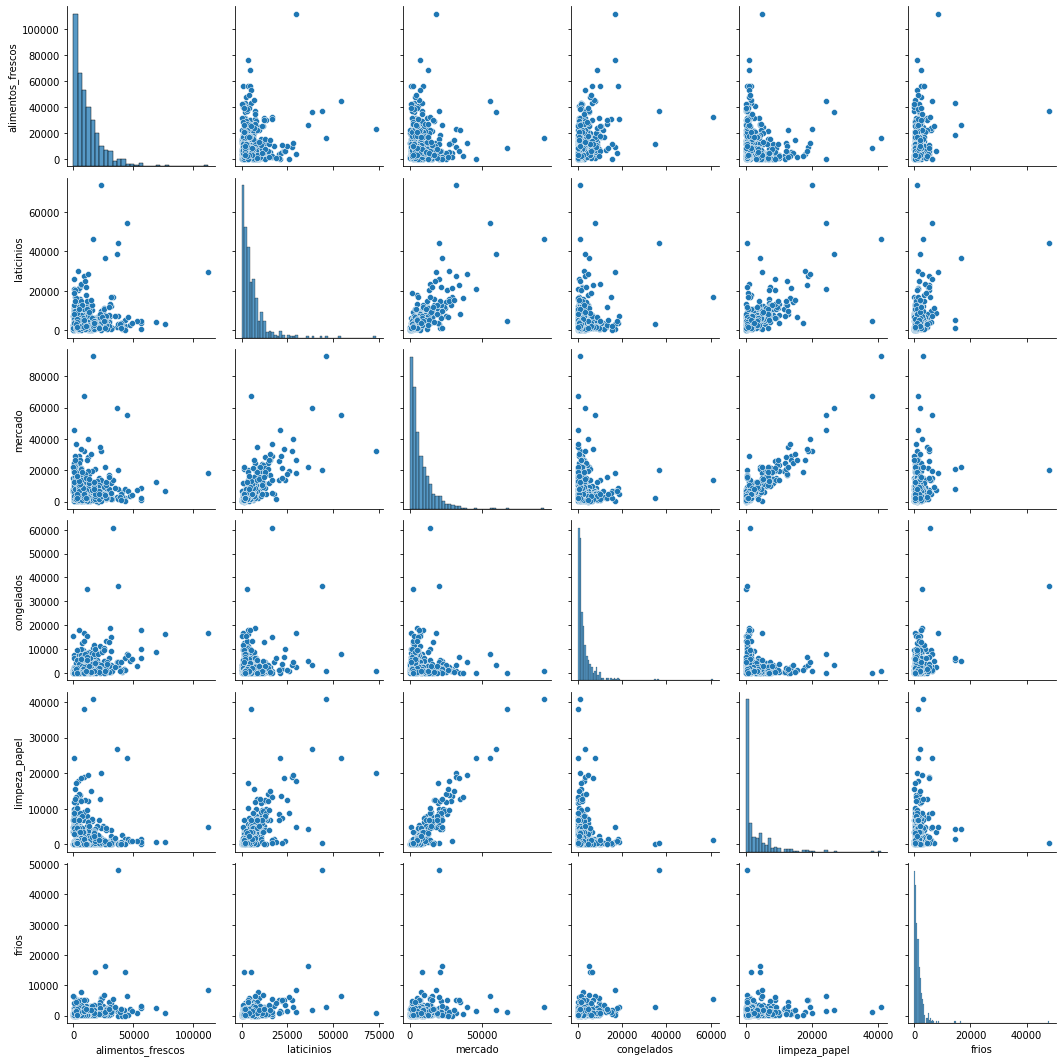

In [ ]:
sns.pairplot(data=dfc)

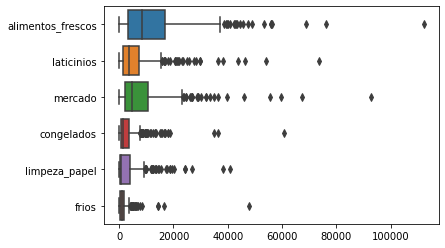

In [ ]:
sns.boxplot(data=dfc, orient='h')

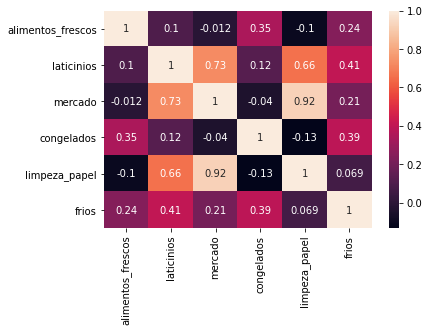

In [ ]:
sns.heatmap(data=dfc.corr(), annot=True)

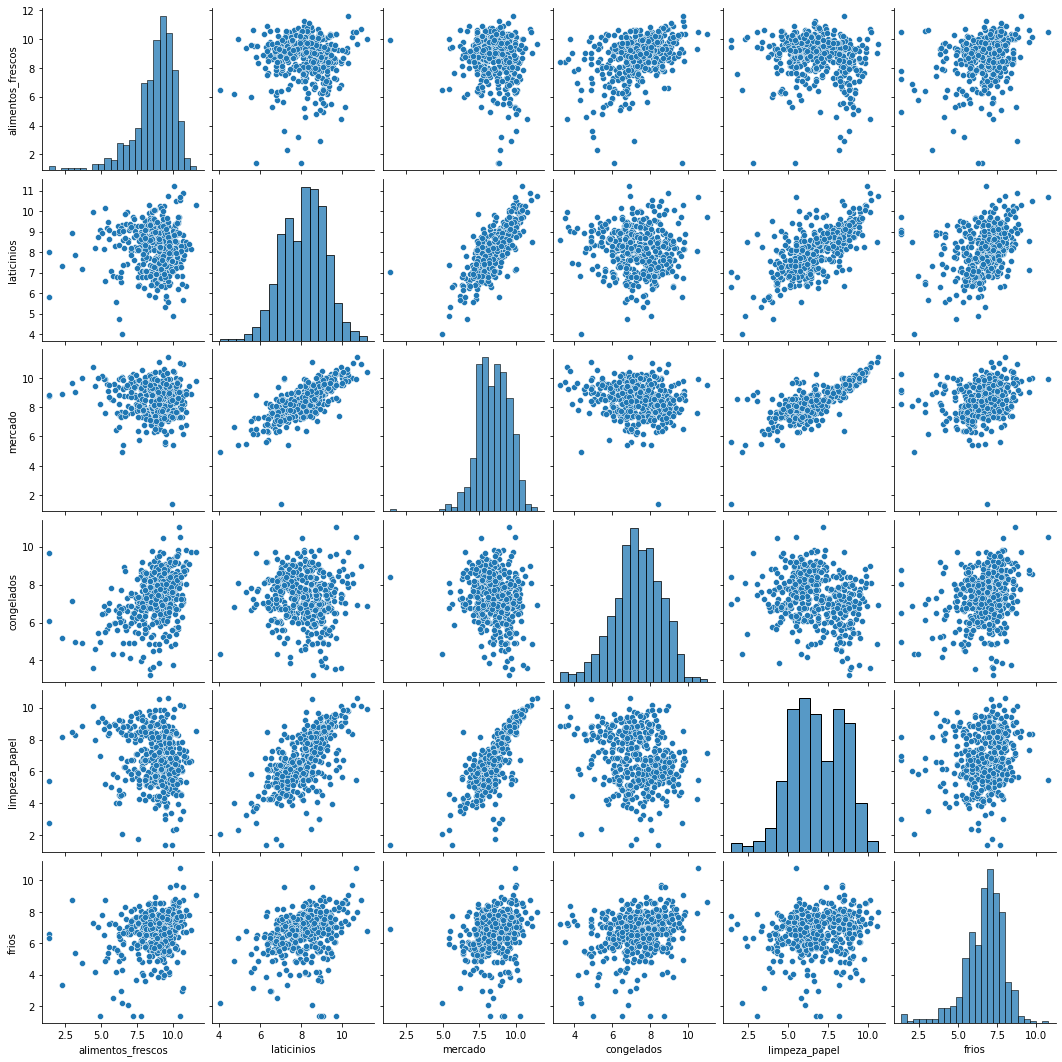

In [ ]:
#log para normalizar os dados
sns.pairplot(data=np.log1p(dfc))

In [ ]:
dfclog = dfc.apply(np.log1p) #apply é similar o map

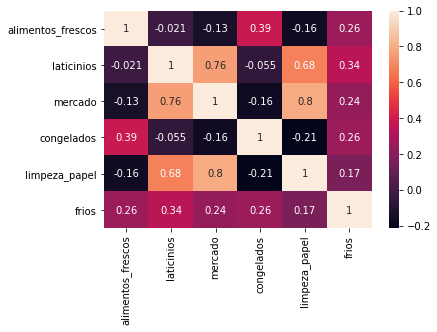

In [ ]:
sns.heatmap(data=dfclog.corr(), annot=True)

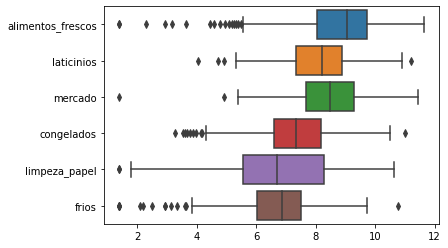

In [ ]:
sns.boxplot(data=dfclog, orient='h')

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8)

kmean.fit(dfclog)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import silhouette_score
labels = kmean.labels_
score = silhouette_score(dfclog, labels)

score

0.1828209973286478

In [ ]:
for n_cluster in range(2, 10):
  kmean = KMeans(n_clusters=n_cluster)
  kmean.fit(dfclog)
  label = kmean.labels_
  score = silhouette_score(dfclog, label)
  print (f'numero de cluster {n_cluster} silhuete {score:.2f}')

numero de cluster 2 silhuete 0.30
numero de cluster 3 silhuete 0.26
numero de cluster 4 silhuete 0.19
numero de cluster 5 silhuete 0.20
numero de cluster 6 silhuete 0.20
numero de cluster 7 silhuete 0.19
numero de cluster 8 silhuete 0.19
numero de cluster 9 silhuete 0.20


In [ ]:
kmean_novo = KMeans(n_clusters=2)
kmean_novo.fit(dfclog)
label_novo = kmean_novo.labels_


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(dfclog)

pcs.shape

(440, 2)

In [ ]:
pcx = pcs[:,0]
pcy = pcs[:,1]

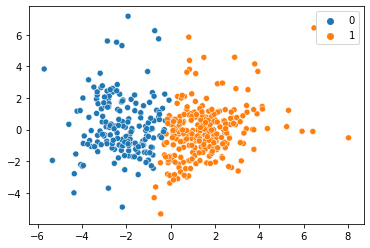

In [ ]:
sns.scatterplot(x=pcx, y=pcy, hue=label_novo)

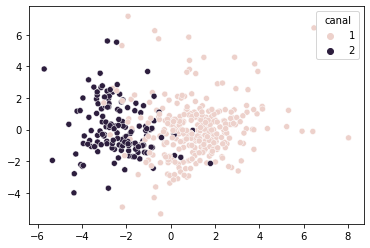

In [ ]:
sns.scatterplot(x=pcx, y=pcy, hue=df['canal'])